# Create Dataset

### Imports

In [1]:
import functions as f
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import datasets, transforms
import cv2
import numpy as np
import os
from sklearn.model_selection import train_test_split
from PIL import Image
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import warnings
warnings.filterwarnings('ignore')

In [2]:
image = mpimg.imread(f'/Users/mushr/Programming/MachineLearning/food_recognition/food_dataset/food_img/beef-picadillo-puffy-tacos.jpg')


### Ingredients List

In [3]:
ingred = open('/Users/mushr/Programming/MachineLearning/food_recognition/ingredients.txt', 'r')
list_of_ing = ingred.read().splitlines()

### Images

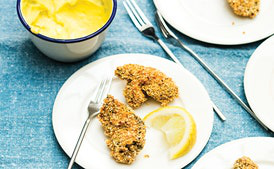

In [4]:
with Image.open('/Users/mushr/Programming/MachineLearning/food_recognition/food_dataset/food_img/oysters-with-parmesan-polenta-crust.jpg') as im:
    display(im)

In [5]:
# Get all image names

path = '/Users/mushr/Programming/MachineLearning/food_recognition/food_dataset/food_img/'
img_names = []

for folder, subfolders, filenames in os.walk(path):
    for img in filenames:
        img_names.append(folder + '/' + img)

len(img_names)

13569

### Pre-Processing Food Dataset

In [6]:
# Dataframe of the food dataset
df = pd.read_csv('/Users/mushr/Programming/MachineLearning/food_recognition/food_dataset/food_data.csv')
df

,Unnamed: 0,Title,Ingredients,Instructions,Image_Name,Cleaned_Ingredients
0,0,Miso-Butter Roast Chicken With Acorn Squash Pa...,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...","Pat chicken dry with paper towels, season all ...",miso-butter-roast-chicken-acorn-squash-panzanella,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher..."
1,1,Crispy Salt and Pepper Potatoes,"['2 large egg whites', '1 pound new potatoes (...",Preheat oven to 400°F and line a rimmed baking...,crispy-salt-and-pepper-potatoes-dan-kluger,"['2 large egg whites', '1 pound new potatoes (..."
2,2,Thanksgiving Mac and Cheese,"['1 cup evaporated milk', '1 cup whole milk', ...",Place a rack in middle of oven; preheat to 400...,thanksgiving-mac-and-cheese-erick-williams,"['1 cup evaporated milk', '1 cup whole milk', ..."
3,3,Italian Sausage and Bread Stuffing,"['1 (¾- to 1-pound) round Italian loaf, cut in...",Preheat oven to 350°F with rack in middle. Gen...,italian-sausage-and-bread-stuffing-240559,"['1 (¾- to 1-pound) round Italian loaf, cut in..."
4,4,Newton's Law,"['1 teaspoon dark brown sugar', '1 teaspoon ho...",Stir together brown sugar and hot water in a c...,newtons-law-apple-bourbon-cocktail,"['1 teaspoon dark brown sugar', '1 teaspoon ho..."
...,...,...,...,...,...,...
13493,13496,Brownie Pudding Cake,"['1 cup all-purpose flour', '2/3 cup unsweeten...",Preheat the oven to 350°F. Into a bowl sift to...,brownie-pudding-cake-14408,"['1 cup all-purpose flour', '2/3 cup unsweeten..."
13494,13497,Israeli Couscous with Roasted Butternut Squash...,"['1 preserved lemon', '1 1/2 pound butternut s...",Preheat oven to 475°F.\nHalve lemons and scoop...,israeli-couscous-with-roasted-butternut-squash...,"['1 preserved lemon', '1 1/2 pound butternut s..."
13495,13498,Rice with Soy-Glazed Bonito Flakes and Sesame ...,['Leftover katsuo bushi (dried bonito flakes) ...,"If using katsuo bushi flakes from package, moi...",rice-with-soy-glazed-bonito-flakes-and-sesame-...,['Leftover katsuo bushi (dried bonito flakes) ...
13496,13499,Spanakopita,['1 stick (1/2 cup) plus 1 tablespoon unsalted...,Melt 1 tablespoon butter in a 12-inch heavy sk...,spanakopita-107344,['1 stick (1/2 cup) plus 1 tablespoon unsalted...


In [35]:
%%time

ing_column = []
not_found = []
not_found_img = []
encode_column = []
rows_to_drop = []
for dish_idx in range(df.shape[0]): # for dish in all dishes in dataframe
    list1 = df['Cleaned_Ingredients'][dish_idx].strip('][').split('\'') # get a row's ingredients
    list1 = [w.lower() for w in list1]
    res_ing = [] # result list of ingredients for a recipe
    encode_list = [0] * len(list_of_ing)
    for l in list1: #  each ingredient word combination
        ing_lst = l.split()
        ing_lst = [w.replace(',', '') for w in ing_lst]
        for w in ing_lst: # each word in ingredient list
            for idx, s in enumerate(list_of_ing):
                if w in s.split():
                    res_ing.append(w)
                    encode_list[idx] = 1
                    break
    encode_column.append(encode_list)
    if res_ing:
        ing_column.append(res_ing)
    else:
        ing_column.append(['No Ingredient'])
        not_found.append((dish_idx))
        not_found_img.append(df['Image_Name'][dish_idx])
        rows_to_drop.append(dish_idx)
        # print(f'No Ingredient for: {df["Image_Name"][dish_idx]} at index: {dish_idx}')
    
df['raw_ingred'] = ing_column
df['Encoded_ingredient'] = encode_column
df = df.drop(not_found).reset_index()

df

CPU times: user 6min 11s, sys: 766 ms, total: 6min 12s
Wall time: 6min 17s


,level_0,index,Unnamed: 0,Title,Ingredients,Instructions,Image_Name,Cleaned_Ingredients,raw_ingred,Encoded_ingredient
0,0,0,0,Miso-Butter Roast Chicken With Acorn Squash Pa...,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...","Pat chicken dry with paper towels, season all ...",miso-butter-roast-chicken-acorn-squash-panzanella,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...","[whole, chicken, kosher, salt, divided, 2, sma...","[1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, ..."
1,1,1,1,Crispy Salt and Pepper Potatoes,"['2 large egg whites', '1 pound new potatoes (...",Preheat oven to 400°F and line a rimmed baking...,crispy-salt-and-pepper-potatoes-dan-kluger,"['2 large egg whites', '1 pound new potatoes (...","[2, large, egg, whites, new, potatoes, inch, i...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, ..."
2,2,2,2,Thanksgiving Mac and Cheese,"['1 cup evaporated milk', '1 cup whole milk', ...",Place a rack in middle of oven; preheat to 400...,thanksgiving-mac-and-cheese-erick-williams,"['1 cup evaporated milk', '1 cup whole milk', ...","[evaporated, milk, whole, milk, garlic, powder...","[1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, ..."
3,3,3,3,Italian Sausage and Bread Stuffing,"['1 (¾- to 1-pound) round Italian loaf, cut in...",Preheat oven to 350°F with rack in middle. Gen...,italian-sausage-and-bread-stuffing-240559,"['1 (¾- to 1-pound) round Italian loaf, cut in...","[to, round, italian, cut, into, cubes, 2, tabl...","[0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, ..."
4,4,4,4,Newton's Law,"['1 teaspoon dark brown sugar', '1 teaspoon ho...",Stir together brown sugar and hot water in a c...,newtons-law-apple-bourbon-cocktail,"['1 teaspoon dark brown sugar', '1 teaspoon ho...","[teaspoon, dark, brown, sugar, teaspoon, hot, ...","[0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
...,...,...,...,...,...,...,...,...,...,...
13480,13480,13493,13496,Brownie Pudding Cake,"['1 cup all-purpose flour', '2/3 cup unsweeten...",Preheat the oven to 350°F. Into a bowl sift to...,brownie-pudding-cake-14408,"['1 cup all-purpose flour', '2/3 cup unsweeten...","[all-purpose, flour, unsweetened, cocoa, powde...","[1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, ..."
13481,13481,13494,13497,Israeli Couscous with Roasted Butternut Squash...,"['1 preserved lemon', '1 1/2 pound butternut s...",Preheat oven to 475°F.\nHalve lemons and scoop...,israeli-couscous-with-roasted-butternut-squash...,"['1 preserved lemon', '1 1/2 pound butternut s...","[lemon, 1/2, butternut, squash, peeled, and, a...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, ..."
13482,13482,13495,13498,Rice with Soy-Glazed Bonito Flakes and Sesame ...,['Leftover katsuo bushi (dried bonito flakes) ...,"If using katsuo bushi flakes from package, moi...",rice-with-soy-glazed-bonito-flakes-and-sesame-...,['Leftover katsuo bushi (dried bonito flakes) ...,"[bonito, dashi, or, fresh, sake, 1/4, teaspoon...","[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
13483,13483,13496,13499,Spanakopita,['1 stick (1/2 cup) plus 1 tablespoon unsalted...,Melt 1 tablespoon butter in a 12-inch heavy sk...,spanakopita-107344,['1 stick (1/2 cup) plus 1 tablespoon unsalted...,"[stick, unsalted, butter, baby, spinach, 1/2, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [87]:
# Get the list of ingredients from a row in dataframe

img_name = 'tomato-garlic-and-potato-frittata-105017'
for i in range(13485):
    try:
        encoded_eng_list = df.loc[df['Image_Name'] == img_name]['Encoded_ingredient'][i]
        break
    except:
        pass

# decode
outlist = []
for idx, presence in enumerate(encoded_eng_list):
    if presence == 1:
        outlist.append(list_of_ing[idx])
        
print(sorted(outlist))

['avocado - peeled', 'basil', 'black pepper', 'center cut pork chops', 'cherry tomatoes', 'cloves', 'egg', 'egg whites', 'eggs', 'finely nuts', 'for 2 crust pie', 'fresh lemon juice', 'garlic', 'grape jelly', 'green pepper, cut into strips', 'kraft grated parmesan cheese', 'mushrooms sliced', 'olive oil', 'onion, sliced thinly', 'parmesan cheese', 'pepper', 'potatoes', 'salt', 'salt and pepper', 'sweet potatoes large', 'tablespoons butter', 'teaspoon salt', 'tomatoes', 'turkish or 1/2 california bay leaf', 'water boiling', 'whole kernel corn']


In [88]:
len(outlist)

31

In [76]:
# Delete images with no ingredients
path = '/Users/mushr/Programming/MachineLearning/food_recognition/food_dataset/food_img/'


for img_name in not_found_img:
    if os.path.exists(img_name):
        os.remove(path+img_name+'.jpg')

rem_list = []
for dish_idx in range(df.shape[0]):
    if not os.path.exists(path + df['Image_Name'][dish_idx] + '.jpg'):
        rem_list.append(dish_idx)
    
df = df.drop(rem_list)
df

,level_0,index,Unnamed: 0,Title,Ingredients,Instructions,Image_Name,Cleaned_Ingredients,raw_ingred,Encoded_ingredient
0,0,0,0,Miso-Butter Roast Chicken With Acorn Squash Pa...,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...","Pat chicken dry with paper towels, season all ...",miso-butter-roast-chicken-acorn-squash-panzanella,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...","[whole, chicken, kosher, salt, divided, 2, sma...","[1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, ..."
1,1,1,1,Crispy Salt and Pepper Potatoes,"['2 large egg whites', '1 pound new potatoes (...",Preheat oven to 400°F and line a rimmed baking...,crispy-salt-and-pepper-potatoes-dan-kluger,"['2 large egg whites', '1 pound new potatoes (...","[2, large, egg, whites, new, potatoes, inch, i...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, ..."
2,2,2,2,Thanksgiving Mac and Cheese,"['1 cup evaporated milk', '1 cup whole milk', ...",Place a rack in middle of oven; preheat to 400...,thanksgiving-mac-and-cheese-erick-williams,"['1 cup evaporated milk', '1 cup whole milk', ...","[evaporated, milk, whole, milk, garlic, powder...","[1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, ..."
3,3,3,3,Italian Sausage and Bread Stuffing,"['1 (¾- to 1-pound) round Italian loaf, cut in...",Preheat oven to 350°F with rack in middle. Gen...,italian-sausage-and-bread-stuffing-240559,"['1 (¾- to 1-pound) round Italian loaf, cut in...","[to, round, italian, cut, into, cubes, 2, tabl...","[0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, ..."
4,4,4,4,Newton's Law,"['1 teaspoon dark brown sugar', '1 teaspoon ho...",Stir together brown sugar and hot water in a c...,newtons-law-apple-bourbon-cocktail,"['1 teaspoon dark brown sugar', '1 teaspoon ho...","[teaspoon, dark, brown, sugar, teaspoon, hot, ...","[0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
...,...,...,...,...,...,...,...,...,...,...
13480,13480,13493,13496,Brownie Pudding Cake,"['1 cup all-purpose flour', '2/3 cup unsweeten...",Preheat the oven to 350°F. Into a bowl sift to...,brownie-pudding-cake-14408,"['1 cup all-purpose flour', '2/3 cup unsweeten...","[all-purpose, flour, unsweetened, cocoa, powde...","[1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, ..."
13481,13481,13494,13497,Israeli Couscous with Roasted Butternut Squash...,"['1 preserved lemon', '1 1/2 pound butternut s...",Preheat oven to 475°F.\nHalve lemons and scoop...,israeli-couscous-with-roasted-butternut-squash...,"['1 preserved lemon', '1 1/2 pound butternut s...","[lemon, 1/2, butternut, squash, peeled, and, a...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, ..."
13482,13482,13495,13498,Rice with Soy-Glazed Bonito Flakes and Sesame ...,['Leftover katsuo bushi (dried bonito flakes) ...,"If using katsuo bushi flakes from package, moi...",rice-with-soy-glazed-bonito-flakes-and-sesame-...,['Leftover katsuo bushi (dried bonito flakes) ...,"[bonito, dashi, or, fresh, sake, 1/4, teaspoon...","[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
13483,13483,13496,13499,Spanakopita,['1 stick (1/2 cup) plus 1 tablespoon unsalted...,Melt 1 tablespoon butter in a 12-inch heavy sk...,spanakopita-107344,['1 stick (1/2 cup) plus 1 tablespoon unsalted...,"[stick, unsalted, butter, baby, spinach, 1/2, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


### Saving Dataset

In [77]:
columns = ['Image_Name', 'Encoded_ingredient']
data_in_npy = df[columns].to_numpy()
data_in_csv = df.to_csv('/Users/mushr/Programming/MachineLearning/food_recognition/food_dataset/ingredients_data.csv', columns=columns)

In [78]:
os.getcwd()

'/Users/mushr/Programming/MachineLearning/food_recognition'

In [62]:
# Saving the data as .NPY
np.save('ingredients_data', data_in_npy)

In [12]:
# Loading the NPY data
# load_dt = np.load('/Users/mushr/Programming/MachineLearning/food_recognition/ingredients_data.npy', allow_pickle=True)

In [13]:
# Split to test and train sets
# x = data_in_npy[:,1]
# y = data_in_npy[:,2]

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [16]:
df.loc[df['Image_Name'] == 'miso-butter-roast-chicken-acorn-squash-panzanella']['Cleaned_Ingredients'][0]

'[\'1 (3½–4-lb.) whole chicken\', \'2¾ tsp. kosher salt, divided, plus more\', \'2 small acorn squash (about 3 lb. total)\', \'2 Tbsp. finely chopped sage\', \'1 Tbsp. finely chopped rosemary\', \'6 Tbsp. unsalted butter, melted, plus 3 Tbsp. room temperature\', \'¼ tsp. ground allspice\', \'Pinch of crushed red pepper flakes\', \'Freshly ground black pepper\', \'⅓ loaf good-quality sturdy white bread, torn into 1" pieces (about 2½ cups)\', \'2 medium apples (such as Gala or Pink Lady; about 14 oz. total), cored, cut into 1" pieces\', \'2 Tbsp. extra-virgin olive oil\', \'½ small red onion, thinly sliced\', \'3 Tbsp. apple cider vinegar\', \'1 Tbsp. white miso\', \'¼ cup all-purpose flour\', \'2 Tbsp. unsalted butter, room temperature\', \'¼ cup dry white wine\', \'2 cups unsalted chicken broth\', \'2 tsp. white miso\', \'Kosher salt\', \'freshly ground pepper\']'

In [46]:
# GET specific row by column title and value
df.loc[df['Image_Name'] == 'miso-butter-roast-chicken-acorn-squash-panzanella']['Ingredients'][0]

'[\'1 (3½–4-lb.) whole chicken\', \'2¾ tsp. kosher salt, divided, plus more\', \'2 small acorn squash (about 3 lb. total)\', \'2 Tbsp. finely chopped sage\', \'1 Tbsp. finely chopped rosemary\', \'6 Tbsp. unsalted butter, melted, plus 3 Tbsp. room temperature\', \'¼ tsp. ground allspice\', \'Pinch of crushed red pepper flakes\', \'Freshly ground black pepper\', \'⅓ loaf good-quality sturdy white bread, torn into 1" pieces (about 2½ cups)\', \'2 medium apples (such as Gala or Pink Lady; about 14 oz. total), cored, cut into 1" pieces\', \'2 Tbsp. extra-virgin olive oil\', \'½ small red onion, thinly sliced\', \'3 Tbsp. apple cider vinegar\', \'1 Tbsp. white miso\', \'¼ cup all-purpose flour\', \'2 Tbsp. unsalted butter, room temperature\', \'¼ cup dry white wine\', \'2 cups unsalted chicken broth\', \'2 tsp. white miso\', \'Kosher salt, freshly ground pepper\']'

In [71]:
enc = [0, 0, 0]
testlist = ['acorn squash', 'acorn citadel', 'whole grain']
samplelist = ['acorn', 'gts']
for w in samplelist:
    for idx, s in enumerate(testlist):
        print(s.split())
        if w in s.split():
            #idx = testlist.index(w)
            enc[idx] = 1
            break
            
        
print()

['acorn', 'squash']
['acorn', 'squash']
['acorn', 'citadel']
['whole', 'grain']
<class 'list'>
